In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/crypto.csv', header=[0,1], index_col=0, parse_dates=[0])
df.tail()

Price          close                                                   \
Ticker           ada           btc      doge          eth         sol   
Date                                                                    
2025-03-27  0.737672  87177.101562  0.190495  2002.357422  138.347382   
2025-03-28  0.705551  84353.148438  0.180190  1895.502930  129.423157   
2025-03-29  0.673922  82597.585938  0.169565  1827.320312  124.587646   
2025-03-30  0.660708  82334.523438  0.166319  1806.218628  124.642632   
2025-03-31  0.661447  82548.914062  0.166715  1823.479980  124.694130   

Price                     High                                       ...  \
Ticker           xrp       ada           btc      doge          eth  ...   
Date                                                                 ...   
2025-03-27  2.338274  0.743597  87786.726562  0.200384  2037.396118  ...   
2025-03-28  2.204137  0.744845  87489.859375  0.192581  2015.454346  ...   
2025-03-29  2.139949  0.711186  84567.335938  0.182207  1911.900879  ...   
2025-03-30  2.136143  0.686722  83505.000000  0.172210  1847.570557  ...   
2025-03-31  2.089897  0.663722  83870.125000  0.168212  1852.551392  ...   

Price           Open                                        volume  \
Ticker          doge          eth         sol       xrp        ada   
Date                                                                 
2025-03-27  0.194798  2008.940552  137.290955  2.349071  574512540   
2025-03-28  0.190495  2002.410522  138.347244  2.338341  789537387   
2025-03-29  0.180191  1895.549683  129.424515  2.204146  643130134   
2025-03-30  0.169571  1827.311035  124.586487  2.139999  489882249   
2025-03-31  0.166319  1806.316528  124.644028  2.136142  754677195   

Price                                                                       
Ticker              btc        doge          eth           sol         xrp  
Date                                                                        
2025-03-27  24413471941  1282332601  11593274543  2.660348e+09  2687267004  
2025-03-28  34198619509  1407200953  18160526498  3.532897e+09  4373544995  
2025-03-29  16969396135  1120659030  12194771785  2.253257e+09  3914811653  
2025-03-30  14763760943   831596449   9854857162  1.639017e+09  2826918737  
2025-03-31  29004228247  1321114553  15765030938  3.206702e+09  4506662719  

[5 rows x 30 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1917 entries, 2020-01-01 to 2025-03-31
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (close, ada)    1917 non-null   float64
 1   (close, btc)    1917 non-null   float64
 2   (close, doge)   1917 non-null   float64
 3   (close, eth)    1917 non-null   float64
 4   (close, sol)    1817 non-null   float64
 5   (close, xrp)    1917 non-null   float64
 6   (High, ada)     1917 non-null   float64
 7   (High, btc)     1917 non-null   float64
 8   (High, doge)    1917 non-null   float64
 9   (High, eth)     1917 non-null   float64
 10  (High, sol)     1817 non-null   float64
 11  (High, xrp)     1917 non-null   float64
 12  (Low, ada)      1917 non-null   float64
 13  (Low, btc)      1917 non-null   float64
 14  (Low, doge)     1917 non-null   float64
 15  (Low, eth)      1917 non-null   float64
 16  (Low, sol)      1817 non-null   float64
 17  (Low, xrp)     

In [5]:
df.columns = ['_'.join(col).strip() for col in df.columns]
df.head()

,close_ada,close_btc,close_doge,close_eth,close_sol,close_xrp,High_ada,High_btc,High_doge,High_eth,...,Open_doge,Open_eth,Open_sol,Open_xrp,volume_ada,volume_btc,volume_doge,volume_eth,volume_sol,volume_xrp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.033458,7200.174316,0.002033,130.802002,NaN,0.192667,0.033813,7254.330566,0.002052,132.835358,...,0.002028,129.630661,NaN,0.192912,22948374,18565664997,51180941,7935230330,NaN,1041134003
2020-01-02,0.032751,6985.470215,0.002009,127.410179,NaN,0.188043,0.033507,7212.155273,0.002110,130.820038,...,0.002034,130.820038,NaN,0.192708,20843934,20802083465,65071106,8032709256,NaN,1085351426
2020-01-03,0.034180,7344.884277,0.002145,134.171707,NaN,0.193521,0.034427,7413.715332,0.002177,134.554016,...,0.002008,127.411263,NaN,0.187948,30162644,28111481032,62619988,10476845358,NaN,1270017043
2020-01-04,0.034595,7410.656738,0.002241,135.069366,NaN,0.194355,0.034685,7427.385742,0.002490,136.052719,...,0.002144,134.168518,NaN,0.193521,29535781,18444271275,94227582,7430904515,NaN,999331594
2020-01-05,0.034721,7411.317383,0.002419,136.276779,NaN,0.195537,0.035356,7544.497070,0.002491,139.410202,...,0.002240,135.072098,NaN,0.194367,21479178,19725074095,52631740,7526675353,NaN,1168067557


In [6]:
df.columns = df.columns.str.lower()
df.head()

,close_ada,close_btc,close_doge,close_eth,close_sol,close_xrp,high_ada,high_btc,high_doge,high_eth,...,open_doge,open_eth,open_sol,open_xrp,volume_ada,volume_btc,volume_doge,volume_eth,volume_sol,volume_xrp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.033458,7200.174316,0.002033,130.802002,NaN,0.192667,0.033813,7254.330566,0.002052,132.835358,...,0.002028,129.630661,NaN,0.192912,22948374,18565664997,51180941,7935230330,NaN,1041134003
2020-01-02,0.032751,6985.470215,0.002009,127.410179,NaN,0.188043,0.033507,7212.155273,0.002110,130.820038,...,0.002034,130.820038,NaN,0.192708,20843934,20802083465,65071106,8032709256,NaN,1085351426
2020-01-03,0.034180,7344.884277,0.002145,134.171707,NaN,0.193521,0.034427,7413.715332,0.002177,134.554016,...,0.002008,127.411263,NaN,0.187948,30162644,28111481032,62619988,10476845358,NaN,1270017043
2020-01-04,0.034595,7410.656738,0.002241,135.069366,NaN,0.194355,0.034685,7427.385742,0.002490,136.052719,...,0.002144,134.168518,NaN,0.193521,29535781,18444271275,94227582,7430904515,NaN,999331594
2020-01-05,0.034721,7411.317383,0.002419,136.276779,NaN,0.195537,0.035356,7544.497070,0.002491,139.410202,...,0.002240,135.072098,NaN,0.194367,21479178,19725074095,52631740,7526675353,NaN,1168067557


In [7]:
df = df[[col for col in df.columns if col.endswith('btc')]]
df.head()

,close_btc,high_btc,low_btc,open_btc,volume_btc
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [8]:
df['P_lag1'] = df['close_btc'].shift(1)
df.head()

,close_btc,high_btc,low_btc,open_btc,volume_btc,P_lag1
Date,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,7200.174316
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,6985.470215
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,7344.884277
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7410.656738


In [9]:
df['P_diff'] = df['close_btc'] - df['P_lag1']
df.head()

,close_btc,high_btc,low_btc,open_btc,volume_btc,P_lag1,P_diff
Date,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,7200.174316,-214.704102
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,6985.470215,359.414062
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,7344.884277,65.772461
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7410.656738,0.660645


In [11]:
preserve_columns = {'P_lag1', 'P_diff'}

df.columns = [col.split('_')[0] if col not in preserve_columns else col for col in df.columns]
df.head()

,close,high,low,open,volume,P_lag1,P_diff
Date,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,7200.174316,-214.704102
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,6985.470215,359.414062
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,7344.884277,65.772461
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7410.656738,0.660645


In [12]:
df['target'] = df['close'].shift(-7)
df.head()

,close,high,low,open,volume,P_lag1,P_diff,target
Date,,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN,8079.862793
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,7200.174316,-214.704102,7879.071289
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,6985.470215,359.414062,8166.554199
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,7344.884277,65.772461,8037.537598
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7410.656738,0.660645,8192.494141


In [13]:
df = df.dropna()
df.head()

,close,high,low,open,volume,P_lag1,P_diff,target
Date,,,,,,,,
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,7200.174316,-214.704102,7879.071289
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,6985.470215,359.414062,8166.554199
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,7344.884277,65.772461,8037.537598
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7410.656738,0.660645,8192.494141
2020-01-06,7769.219238,7781.867188,7409.292969,7410.452148,23276261598,7411.317383,357.901855,8144.194336


In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model = RandomForestRegressor(n_estimators=120)

In [19]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120)

In [20]:
y_predicted = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
MEAN = np.sqrt(mean_squared_error(y_test, y_predicted))
MEAN

np.float64(3363.2940909530093)

In [23]:
import joblib
from sklearn.ensemble import RandomForestRegressor


joblib.dump(model, 'bitcoin_price_model_2025-06-16.pkl')
print("Model saved to 'bitcoin_price_model_2025-06-16.pkl'")

Model saved to 'bitcoin_price_model_2025-06-16.pkl'


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_is_fitted

# Fetch historical data for Bitcoin using yfinance
btc = yf.Ticker("BTC-USD")
# Fetch 14 days of data to cover 7 days ago to today (June 16, 2025)
historical_data = btc.history(period="14d", interval="1d")
print(f"Historical data fetched from {historical_data.index.min().date()} to {historical_data.index.max().date()}")

# Extract the latest price and timestamp
latest_price = historical_data['Close'].iloc[-1]
last_updated = historical_data.index[-1]
print(f"Latest Bitcoin price: ${latest_price:.2f} USD, Last updated: {last_updated}")

# Prepare historical features for the last 7 days
historical_features = historical_data[['Open', 'High', 'Low', 'Close', 'Volume']].tail(7).copy()  # Last 7 days (June 9 to June 16, 2025)
historical_features['P_lag1'] = historical_features['Close'].shift(1).fillna(historical_features['Close'].iloc[0])
historical_features['P_diff'] = historical_features['Close'].diff().fillna(0)
historical_features.index = historical_features.index.date  # Use date only for alignment

# Load the pre-trained model
try:
    model = joblib.load('bitcoin_price_model_2025-06-16.pkl')
    print("Model loaded successfully.")
    check_is_fitted(model, 'estimators_')  # Check for fitted state
    print("Model is fitted and ready for prediction.")
except FileNotFoundError:
    print("Error: Pre-trained model file 'bitcoin_price_model_2025-06-16.pkl' not found. Please save the model first.")
    exit()
except Exception as e:
    print(f"Error loading model: {e}. The model may not be fitted or the file is corrupted.")
    print("Please ensure you save the model after fitting it with 5 years of data.")
    exit()

# Prepare features for prediction with explicit column order
expected_features = ['close', 'high', 'low', 'open', 'volume', 'P_lag1', 'P_diff']  # Assumed training order
X_pred = historical_features.rename(columns={
    'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'
})[expected_features]  # Reorder to match training

# Debug: Print feature names to verify
print(f"Prediction feature names: {X_pred.columns.tolist()}")
print(f"Expected feature names (training order): {expected_features}")

# Repeat latest features for future days
latest_row = X_pred.iloc[-1].copy()
future_features = pd.DataFrame([latest_row] * 7, columns=expected_features, index=pd.date_range(start=historical_features.index[-1] + pd.Timedelta(days=1), periods=7, freq='D').date)
X_pred_14days = pd.concat([X_pred, future_features], ignore_index=True)

# Predict for 14 days (7 past + 7 future)
y_pred_14days = model.predict(X_pred_14days)
prediction_dates = pd.date_range(start=historical_features.index.min(), periods=14, freq='D')
predictions_df = pd.DataFrame({
    'prediction_date': prediction_dates,
    'predicted_price': y_pred_14days
})
predictions_df['prediction_date'] = pd.to_datetime(predictions_df['prediction_date'])

# Save predictions to CSV
predictions_df.to_csv('predicted_prices_2025-06-16.csv', index=False)
print("Predictions saved to 'predicted_prices_2025-06-16.csv'")
print("Predictions for the past 7 days and next 7 days:")
print(predictions_df)

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [39]:
import pandas as pd
import plotly.express as px
import yfinance as yf
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fetch historical data for Bitcoin using yfinance
btc = yf.Ticker("BTC-USD")
# Fetch 8 days of data to cover June 9 to June 16, 2025
historical_data = btc.history(period="8d", interval="1d")
print(f"Historical data fetched from {historical_data.index.min().date()} to {historical_data.index.max().date()}")

# Extract real close prices
real_prices = historical_data['Close']
real_prices_df = pd.DataFrame({
    'prediction_date': pd.to_datetime(real_prices.index.date),
    'real_price': real_prices.values
})
real_prices_df.set_index('prediction_date', inplace=True)
print(f"Real close prices:\n{real_prices_df}")

# Load predictions from CSV
try:
    predictions = pd.read_csv('predicted_prices_2025-06-16.csv', parse_dates=['prediction_date'])
    predictions.set_index('prediction_date', inplace=True)
    print("Loaded predictions from 'predicted_prices_2025-06-16.csv':")
    print(predictions.head(13))
except FileNotFoundError:
    print("Error: 'predicted_prices_2025-06-16.csv' not found. Please run the prediction script first.")
    exit()

# Filter predictions for the last 7 days (June 9 to June 16, 2025)
current_date = pd.Timestamp.now()
start_date = current_date - pd.DateOffset(days=7)  # June 9, 2025
recent_predictions = predictions[(predictions.index >= start_date) & (predictions.index <= current_date)]

# Merge with real prices
comparison_df = recent_predictions.join(real_prices_df['real_price'], how='left')
comparison_df['P_diff'] = comparison_df['predicted_price'] - comparison_df['real_price']
comparison_df['P_proc_error'] = abs(comparison_df['P_diff'] / comparison_df['real_price'] * 100)

# Debug: Check comparison data
print(f"Comparison data:\n{comparison_df}")

# Append to CSV
header = not pd.io.common.file_exists('predicted_vs_real_report.csv')
comparison_df.reset_index().to_csv('predicted_vs_real_report.csv', mode='a', header=header, index=False)
print(f"Data appended to 'predicted_vs_real_report.csv'")

# Plot
fig = px.scatter(
    comparison_df.reset_index(),
    x='predicted_price',
    y='real_price',
    hover_data=['prediction_date', 'predicted_price', 'real_price'],
    title=f'Predicted vs Real Close Prices (yfinance) - {current_date.date()}',
    labels={'predicted_price': 'Predicted Close Price', 'real_price': 'Real Close Price'}
)

fig.add_shape(
    type="line",
    x0=comparison_df['predicted_price'].min() or 0,
    y0=comparison_df['predicted_price'].min() or 0,
    x1=comparison_df['predicted_price'].max() or real_prices.iloc[-1],
    y1=comparison_df['predicted_price'].max() or real_prices.iloc[-1],
    line=dict(color="red", dash="dash")
)

fig.show(renderer="browser")

# Metrics
if not comparison_df['real_price'].isna().all():
    mae = mean_absolute_error(comparison_df['real_price'].dropna(), comparison_df['predicted_price'].loc[comparison_df['real_price'].dropna().index])
    rmse = mean_squared_error(comparison_df['real_price'].dropna(), comparison_df['predicted_price'].loc[comparison_df['real_price'].dropna().index]) ** 0.5
    print(f"\nMetrics for available data:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
else:
    print("\nNo valid comparison data available yet for all days.")

Historical data fetched from 2025-06-10 to 2025-06-17
Real close prices:
                    real_price
prediction_date               
2025-06-10       110257.234375
2025-06-11       108686.625000
2025-06-12       105929.054688
2025-06-13       106090.968750
2025-06-14       105472.406250
2025-06-15       105552.023438
2025-06-16       106796.757812
2025-06-17       105542.023438
Loaded predictions from 'predicted_prices_2025-06-16.csv':
                 predicted_price
prediction_date                 
2025-06-11         100378.637500
2025-06-12         101132.688542
2025-06-13         101266.734635
2025-06-14          98745.964128
2025-06-15          98911.892122
2025-06-16          99212.615625
2025-06-17         100607.203320
2025-06-18         100607.203320
2025-06-19         100607.203320
2025-06-20         100607.203320
2025-06-21         100607.203320
2025-06-22         100607.203320
2025-06-23         100607.203320
Comparison data:
                 predicted_price     real_pric

<Axes: xlabel='predicted_price', ylabel='real_price'>

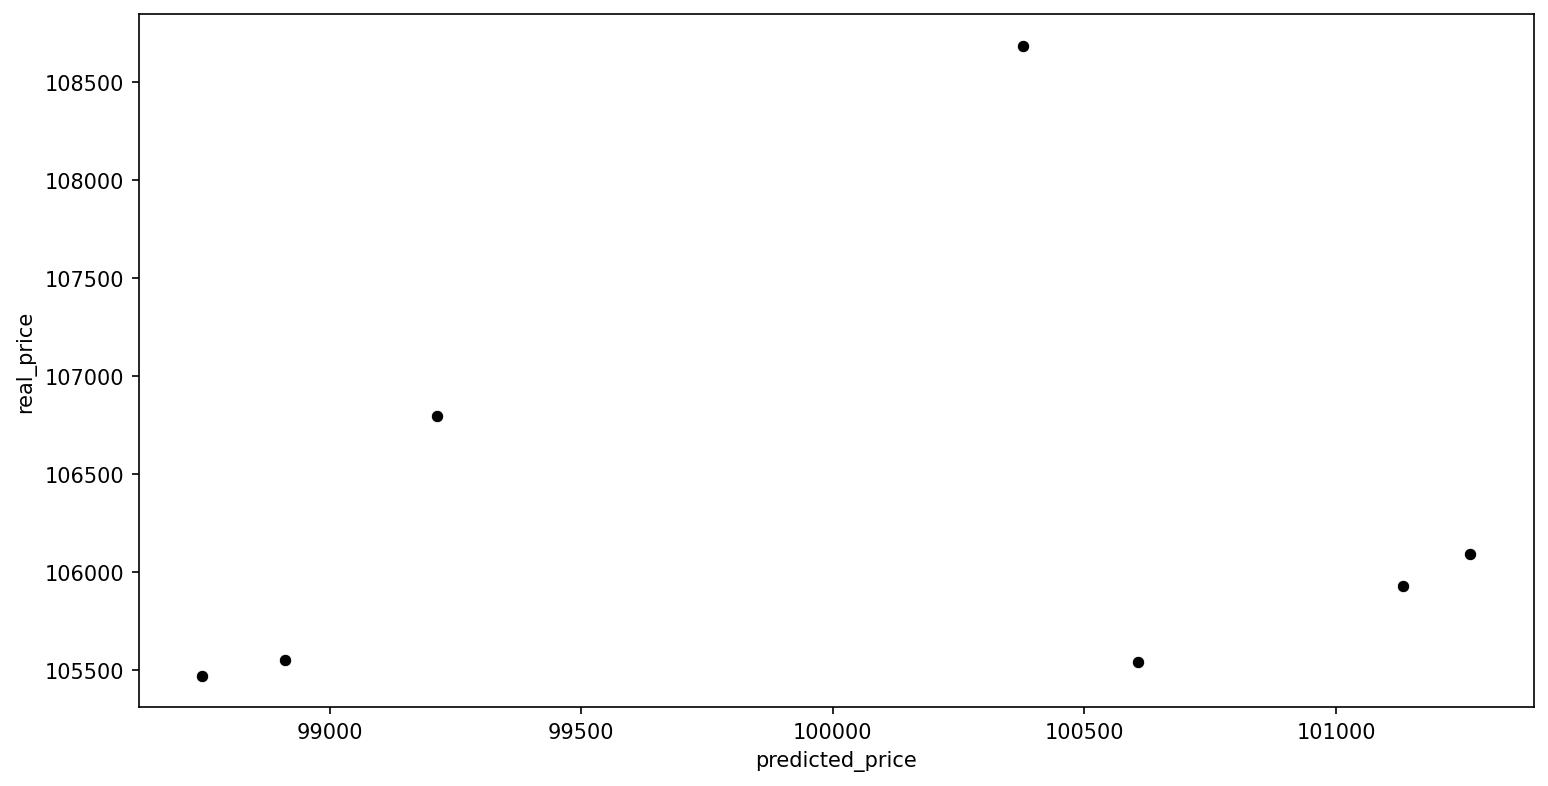

In [40]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(x='predicted_price',y='real_price' ,data=comparison_df,color='black')
# plt.plot(signal_range,output)